In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

In [2]:
clean_st_names = []
bp_street_names = pd.read_csv('./csv_tables/bp_street_name_only.csv', index_col=0)
for index, row in bp_street_names.iterrows():
    if isinstance(row['street_name'], float):
        clean_st_names.append('')
    else:
        st_name = row['street_name'].split("מ-")
        clean_st_names.append(st_name[0].strip())


clean_st_names

['נמיר',
 'פרופס',
 'יאיר רוזנבלום',
 'קרן קיימת לישראל',
 'רקנאטי בגינה',
 '2426',
 'שי עגנון',
 'איינשטיין',
 'איינשטיין',
 'שי עגנון',
 'משעול 2364',
 'בני אפריים',
 'אהרון בקר',
 'אהרון בקר',
 'בני אפרים',
 'בני אפרים',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'נמל ת"א',
 'חבקוק',
 '2397',
 'הרברט סמואל',
 'נורדאו',
 'נורדאו',
 'נורדאו',
 'פנקס'

Loading data frames and fixing some minor issues with their columns.

In [3]:
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q

,oidrova,krova,dateimport,ShapeArea,geometry
0,1.0,1.0,01/12/2015 02:28:14,1.301654e+07,"POLYGON ((670795.655 3555762.452, 670797.577 3..."
1,2.0,2.0,01/12/2015 02:28:14,8.013404e+06,"POLYGON ((672021.029 3553364.492, 672014.690 3..."
2,3.0,3.0,01/12/2015 02:28:14,3.380430e+06,"POLYGON ((668311.070 3552547.701, 668311.229 3..."
3,4.0,4.0,01/12/2015 02:28:14,4.510255e+06,"POLYGON ((670771.828 3552544.564, 670771.584 3..."
4,5.0,6.0,01/12/2015 02:28:14,2.089044e+06,"POLYGON ((668160.048 3550196.192, 668162.425 3..."
5,6.0,9.0,01/12/2015 02:28:14,7.879856e+06,"POLYGON ((668811.121 3546980.368, 668808.698 3..."
6,7.0,5.0,01/12/2015 02:28:14,3.024297e+06,"POLYGON ((666698.783 3550619.396, 666701.339 3..."
7,8.0,8.0,01/12/2015 02:28:14,3.420996e+06,"POLYGON ((667954.133 3548820.374, 667956.725 3..."
8,9.0,7.0,01/12/2015 02:28:14,6.343551e+06,"POLYGON ((665854.540 3548193.053, 665868.137 3..."


In [4]:


# Load the Roava
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')

# loading accidents and BP
accidents_bp_distance = gpd.read_parquet('./csv_tables/accidents_bp_distance_ta.parquet')
accidents_bp_distance.set_geometry('geometry', inplace=True)
ta_q = ta_q.to_crs(accidents_bp_distance.crs)
if 'index_left' in accidents_bp_distance.columns:
    accidents_bp_distance = accidents_bp_distance.rename(columns={'index_left': 'accidents_index_left'})
if 'index_right' in accidents_bp_distance.columns:
    accidents_bp_distance = accidents_bp_distance.rename(columns={'index_right': 'accidents_index_right'})

# loading BP
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM/Bicycle Routes.shp")
bicycle_paths.columns = ['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'create_year',
                         'shemmikta', 'miflas', 'create_date', 'geometry']
bicycle_paths.create_year = bicycle_paths.create_year.fillna(2000).astype(int)
bicycle_paths
# changing col names to fit other dataframes 
bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')

bicycle_paths['street_name'] = clean_st_names

bp = bicycle_paths.to_crs(epsg=4326)


print(accidents_bp_distance.shape, ta_q.shape, bp.shape)
accidents_bp_distance.crs, ta_q.crs, bp.crs


(8435, 167) (9, 5) (858, 11)


(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [5]:
accidents_bp_distance

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_damage,vehicle_damage_hebrew,accident_date,geometry,poly_geo,distance,accidents_index_right,oid_shvil,street_name,shemmikta
0,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1.0,...,4.0,אין נזק,2013-07-27 01:00:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
1,2013023048,32013023048,3,3,2,נהג נפגע,0,15,70-74,1.0,...,1.0,קל,2013-02-17 12:00:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
2,2013038829,32013038829,3,3,2,נהג נפגע,0,6,25-29,1.0,...,4.0,אין נזק,2013-11-11 15:45:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
3,2013040288,32013040288,3,3,2,נהג נפגע,0,6,25-29,1.0,...,4.0,אין נזק,2013-10-03 16:00:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
4,2013055718,32013055718,3,3,2,נהג נפגע,0,6,25-29,1.0,...,4.0,אין נזק,2013-10-24 20:00:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,2023093059,32023093059,3,3,2,נהג נפגע,1982,13,60-64,1.0,...,1.0,קל,2023-09-29 11:00:00,POINT (34.74447 32.03439),"LINESTRING (34.74412 32.03383, 34.74440 32.034...",0.637950,202,116,בת ים,בת ים משפתי ישנים עד זכרון קדושים
8431,2023095652,12023095652,1,1,2,נהג נפגע,2012,6,25-29,1.0,...,4.0,אין נזק,2023-10-31 09:00:00,POINT (34.83600 32.10689),"LINESTRING (34.83796 32.10692, 34.83678 32.106...",87.420962,21,14,פארק הירקון,פארק הירקון
8432,2023094457,32023094457,3,3,2,נהג נפגע,2017,5,20-24,2.0,...,4.0,אין נזק,2023-09-27 16:15:00,POINT (34.77526 32.04119),"LINESTRING (34.77553 32.04130, 34.77513 32.04079)",27.566972,797,413,גיתית,גיתית
8433,2023094504,32023094504,3,3,2,נהג נפגע,2022,8,35-39,2.0,...,4.0,אין נזק,2023-04-27 13:45:00,POINT (34.77460 32.04446),"LINESTRING (34.77207 32.04289, 34.77211 32.043...",136.657851,97,43,3383,שביל 3383 עד בן צבי


## Understand what can be done, what are the limitations with using quoters

**Explanation:** <br>
Currently we don't have enough accidents per street to come to a conclusion so we decided to go over quoters number of accidents.<br>
Trying to understand what can I learn with the current information.<br>
So just writing what comes up to mind and subsequent questions, and figuring out what questions can be answered.

1. Streets can start in one quoter and end in a different quoter, do we consider the street or the quoter? 
    * Q: So how many street like that do we have? **Cannot be answered**
        * A: We don't have a UTM of streets so we can't know, only location of accident.
            * Q: How many accidents on a certain street happen on a street in one quoter and how many accidents on the same street happen in different quoters? **Can be answered**
    * Q: How many BP start in one quoter and end in a different quoter? **Can be answered**



Questions to answer:
* How many accidents on a certain street happen in one quoter and how many accidents on the same street happen in different quoters?
* How many BP start in one quoter and end in a different quoter?
* How many accidents in each quarter?
* How many accidents in each quarter through the years and also indicate when a bp was created
    * The plot be a line plot where each line indicates the quarter, on the line will be dots that indicate when BP has finished it's construction.
    * Show severity of accidents


In [6]:
ta_q

,oidrova,krova,dateimport,ShapeArea,geometry
0,1,1,01/12/2015 02:28:14,1.301654e+07,"POLYGON ((34.81055 32.12532, 34.81056 32.12481..."
1,2,2,01/12/2015 02:28:14,8.013404e+06,"POLYGON ((34.82311 32.10352, 34.82304 32.10352..."
2,3,3,01/12/2015 02:28:14,3.380430e+06,"POLYGON ((34.78366 32.09671, 34.78366 32.09669..."
3,4,4,01/12/2015 02:28:14,4.510255e+06,"POLYGON ((34.80973 32.09631, 34.80972 32.09622..."
4,5,6,01/12/2015 02:28:14,2.089044e+06,"POLYGON ((34.78165 32.07553, 34.78167 32.07553..."
5,6,9,01/12/2015 02:28:14,7.879856e+06,"POLYGON ((34.78798 32.04643, 34.78796 32.04656..."
6,7,5,01/12/2015 02:28:14,3.024297e+06,"POLYGON ((34.76625 32.07956, 34.76627 32.07954..."
7,8,8,01/12/2015 02:28:14,3.420996e+06,"POLYGON ((34.77923 32.06315, 34.77925 32.06313..."
8,9,7,01/12/2015 02:28:14,6.343551e+06,"POLYGON ((34.75689 32.05781, 34.75703 32.05775..."


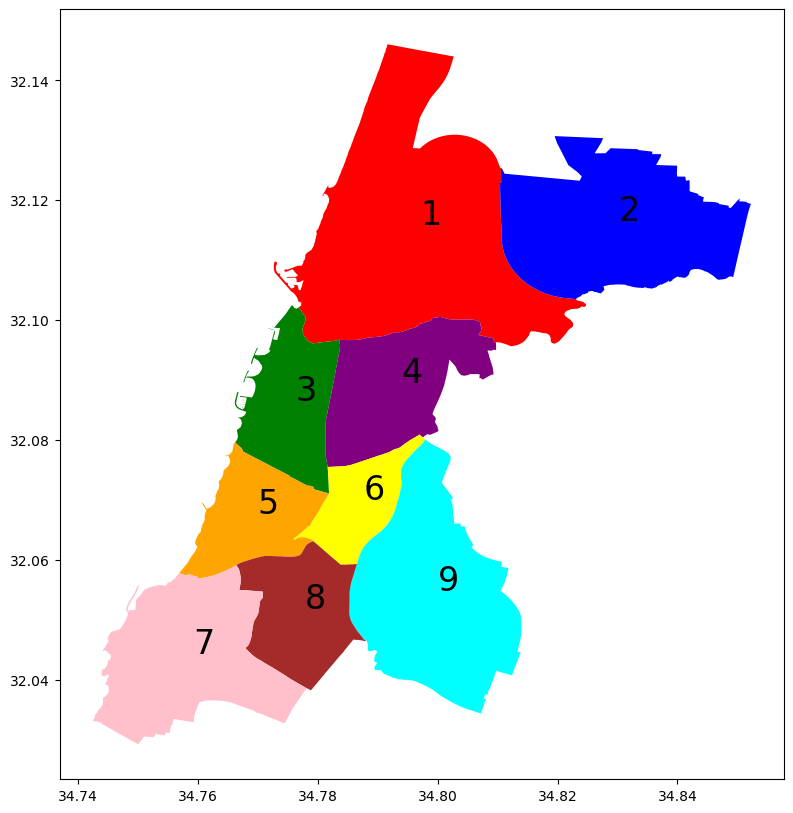

In [7]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Example GeoDataFrame (Replace with your actual GeoDataFrame)
# ta_q = gpd.read_file('your_shapefile.shp')

# Ensure 'index' column exists for referencing
ta_q['index'] = ta_q.index

# Define a list of colors
color_map = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
    5: 'orange', 6: 'yellow', 7: 'pink', 8: 'brown', 9: 'cyan'
}

# Basic plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each shape with a different color from the list
for idx, row in ta_q.iterrows():
    color = color_map[row['krova']]  # Cycle through the colors list
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color)

    # Get the centroid of the polygon to place the text
    centroid = row['geometry'].centroid
    ax.annotate(text=row['krova'], xy=(centroid.x, centroid.y), 
                xytext=(3, 3), textcoords="offset points",
                fontsize=24, color='black')

plt.show()


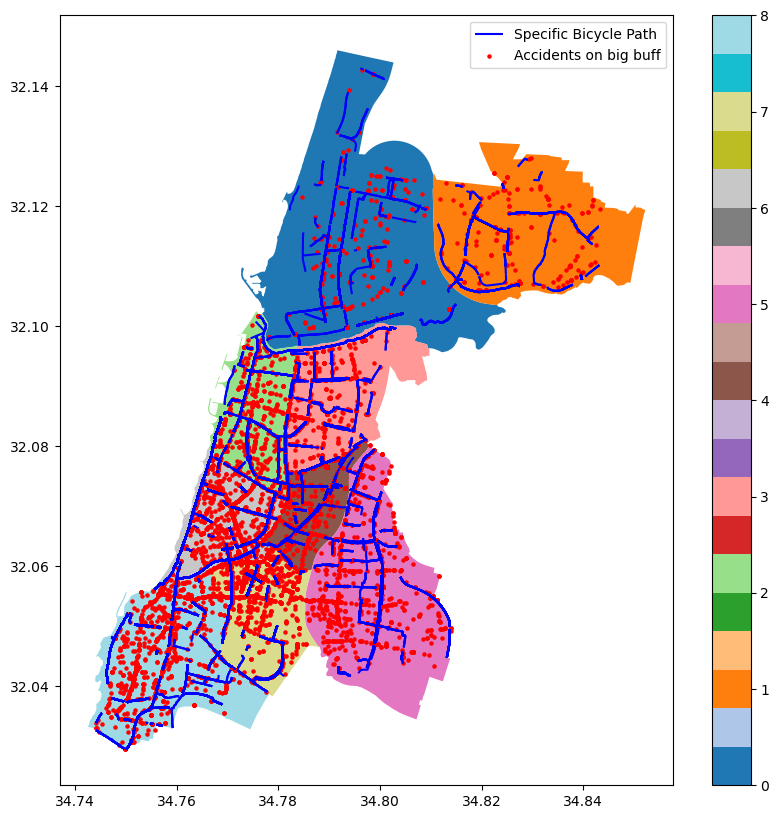

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

ta_q.plot(ax=ax, column='index', cmap='tab20', legend=True, label='Specific Bicycle Path')
accidents_bp_distance['poly_geo'].plot(ax=ax, color='blue', label='Specific Bicycle Path')
accidents_bp_distance.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

plt.legend()
plt.show()

##  How many accidents on a certain street happen in one quoter and how many accidents on the same street happen in different quoters?

1. Join the accidents df and quarters df 
2. group by street than value count quarters

In [9]:
# I might have some duplicated accidents, different people same accident
a = accidents_bp_distance.provider_and_id.value_counts()
a[a > 1].sum()

780

In [10]:
# Perform the spatial join
accidents_with_quarters = gpd.sjoin(accidents_bp_distance, ta_q[['krova', 'geometry']], how='inner', predicate='intersects')

accidents_with_quarters.krova

0       5
1       5
2       5
3       5
4       5
       ..
8401    9
8402    9
8405    9
8406    9
8423    9
Name: krova, Length: 8397, dtype: int8

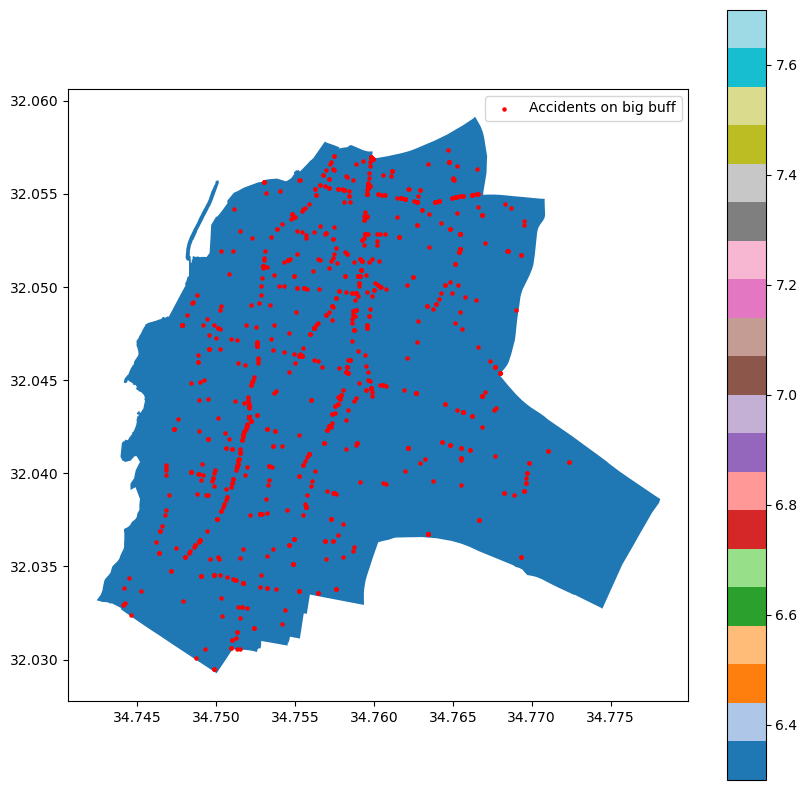

In [11]:
# Testing to see if the join worked

fig, ax = plt.subplots(figsize=(10, 10))

ta_q[ta_q.krova == 7].plot(ax=ax, column='krova', cmap='tab20', legend=True, label='Specific Bicycle Path')
accidents_with_quarters[accidents_with_quarters.krova == 7].plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

plt.legend()
plt.show()

In [12]:
street_rova_vc = accidents_with_quarters.groupby('street1_hebrew').krova.nunique().sort_values()

street_rova_vc[street_rova_vc > 1].shape, street_rova_vc[street_rova_vc == 1].shape


((61,), (713,))

In [13]:
begin_rova = accidents_with_quarters[accidents_with_quarters.street1_hebrew == 'דרך בגין']['krova'].unique()
begin_rova

array([5, 6, 8, 4], dtype=int8)

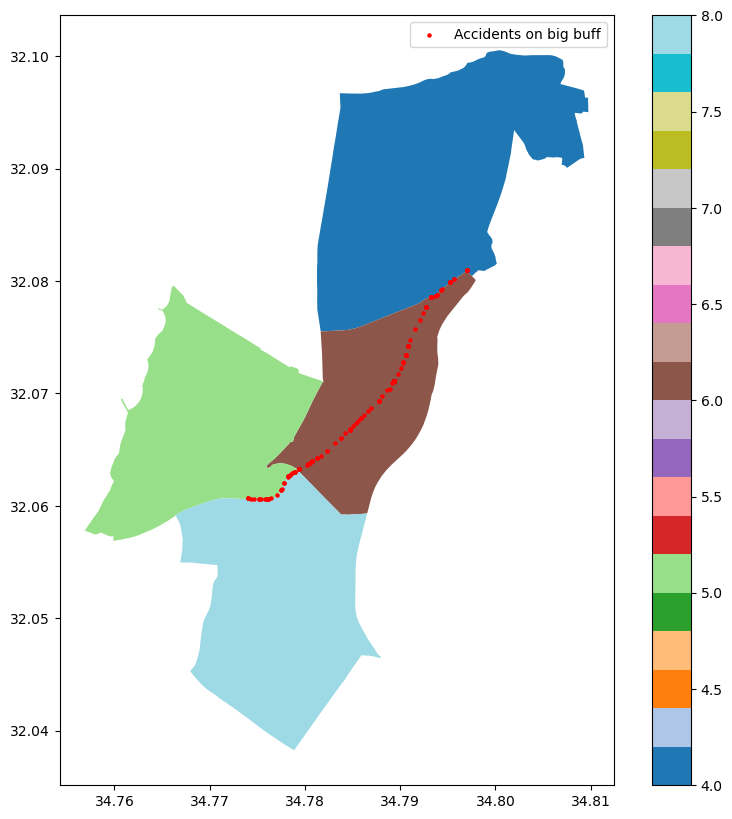

In [14]:
# Testing to see if the join worked

fig, ax = plt.subplots(figsize=(10, 10))

ta_q[ta_q.krova.isin(begin_rova)].plot(ax=ax, column='krova', cmap='tab20', legend=True, label='Specific Bicycle Path')
accidents_with_quarters[accidents_with_quarters.street1_hebrew == 'דרך בגין'].plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

plt.legend()
plt.show()

## How many accidents in each quarter

In [15]:
accidents_with_quarters.groupby('krova').count()[['accident_id', 'provider_and_id']].sort_values(by=['accident_id'])

,accident_id,provider_and_id
krova,,
2,240,240
1,488,488
6,797,797
3,862,862
4,944,944
8,1170,1170
9,1197,1197
7,1262,1262
5,1437,1437


In [16]:
accidents_with_quarters.columns[accidents_with_quarters.columns.str.contains('oid')]

Index(['oid_shvil'], dtype='object')

## How many accidents in each quarter through the years and also indicate when a bp was created

In [17]:
bp

,oid_shvil,msorech,dateimport,width,direction,create_year,shemmikta,miflas,create_date,geometry,street_name
0,1,95.10,11/02/2024 00:31:49,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (34.80054 32.14000, 34.80089 32.140...",נמיר
1,2,201.14,11/02/2024 00:31:49,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (34.79394 32.12300, 34.79327 32.123...",פרופס
2,3,696.31,11/02/2024 00:31:49,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (34.79394 32.12300, 34.79413 32.123...",יאיר רוזנבלום
3,4,659.20,11/02/2024 00:31:49,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (34.79522 32.12243, 34.79581 32.122...",קרן קיימת לישראל
4,5,362.67,11/02/2024 00:31:49,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (34.80148 32.12168, 34.80166 32.122...",רקנאטי בגינה
...,...,...,...,...,...,...,...,...,...,...,...
853,452,172.22,11/02/2024 00:31:49,1.5,None,2016,הגדוד העברי מללוינסקי עד צ'לנוב,None,None,"LINESTRING (34.77990 32.05691, 34.77964 32.057...",הגדוד העברי
854,453,268.59,11/02/2024 00:31:49,2.5,דו סטרי,2023,נמיר מרוקח עד חיים לבנון,כביש,None,"LINESTRING (34.79361 32.10025, 34.79356 32.100...",נמיר
855,454,24.93,11/02/2024 00:31:49,NaN,None,2000,None,None,None,"LINESTRING (34.77309 32.08740, 34.77284 32.08746)",
856,455,155.53,11/02/2024 00:31:49,2.5,דו סטרי,2022,גשר רדינג ווקוף,כביש,None,"LINESTRING (34.77632 32.10170, 34.77628 32.101...",גשר רדינג ווקוף


In [18]:
accidents_bp_quarters = accidents_with_quarters.merge(bp[['oid_shvil', 'create_year','msorech']], on='oid_shvil', how='left')
bp_create_year = accidents_bp_quarters.create_year
accidents_bp_quarters = accidents_bp_quarters.drop(columns=['create_year']).copy()
accidents_bp_quarters['bp_create_year'] = bp_create_year

# Display the result
accidents_bp_quarters.head()

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,poly_geo,distance,accidents_index_right,oid_shvil,street_name,shemmikta,index_right,krova,msorech,bp_create_year
0,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1.0,...,"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון,6,5,889.0,2021
1,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1.0,...,"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון,6,5,889.0,2021
2,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1.0,...,"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון,6,5,889.0,2021
3,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1.0,...,"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון,6,5,889.0,2021
4,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1.0,...,"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון,6,5,889.0,2021


In [19]:
accidents_bp_quarters.columns.str.contains('msorech')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [20]:
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt

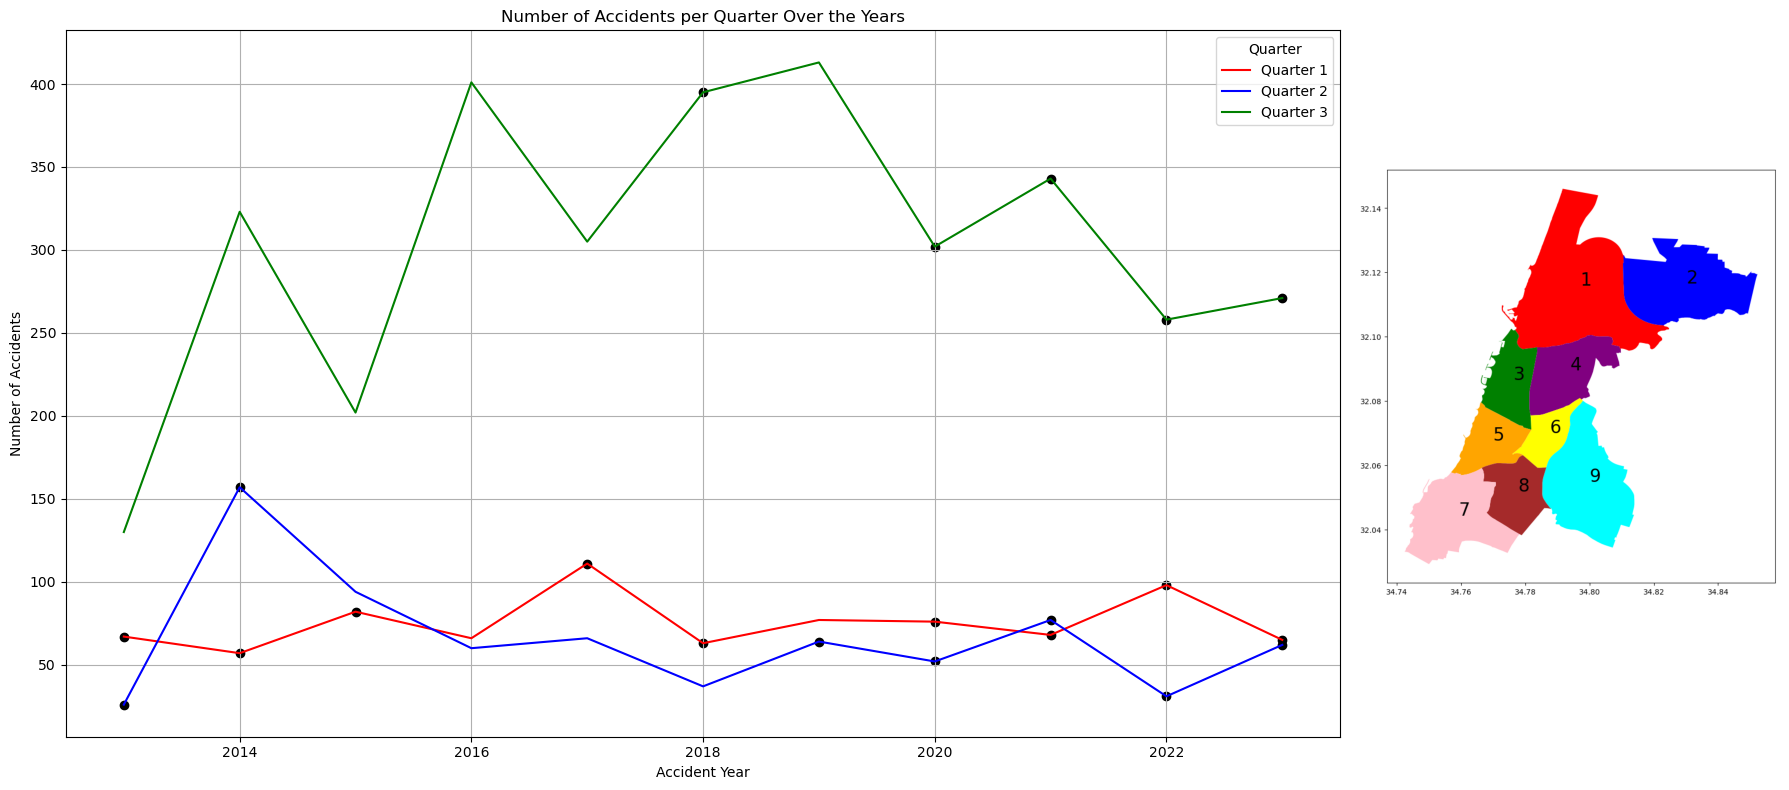

In [21]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.gridspec as gridspec
import pandas as pd
import geopandas as gpd

def plot_accidents_and_image(accidents_bp_quarters, krova_list, image_path):
    # Define a list of more muted colors
    color_map = {
        1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
        5: 'orange', 6: 'yellow', 7: 'pink', 8: 'brown', 9: 'cyan'
    }

    # Ensure 'krova' column is present and is numeric
    accidents_bp_quarters['krova'] = pd.to_numeric(accidents_bp_quarters['krova'])

    # Group the data by 'krova' and 'accident_year' to get the count of accidents
    accident_counts = accidents_bp_quarters[accidents_bp_quarters['krova'].isin(krova_list)].groupby(['krova', 'accident_year']).size().reset_index(name='accident_count')

    # Create a grid layout for the plot and the image
    fig = plt.figure(figsize=(18, 8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

    # Plot on the left side
    ax = plt.subplot(gs[0])

    # Plot each quarter
    for krova, group in accident_counts.groupby('krova'):
        ax.plot(group['accident_year'], group['accident_count'], label=f'Quarter {krova}', color=color_map.get(krova))

        # Add dots for bp_create_year
        for bp_year in accidents_bp_quarters[accidents_bp_quarters['krova'] == krova]['bp_create_year'].unique():
            if not pd.isna(bp_year):
                accident_count_at_bp_year = group[group['accident_year'] == bp_year]['accident_count'].values
                if len(accident_count_at_bp_year) > 0:
                    ax.scatter(bp_year, accident_count_at_bp_year, color='black')  # You can customize the dot color

    # Customize the plot
    ax.set_xlabel('Accident Year')
    ax.set_ylabel('Number of Accidents')
    ax.set_title('Number of Accidents per Quarter Over the Years')
    ax.legend(title='Quarter')
    ax.grid(True)

    # Display an image on the right side
    ax1 = plt.subplot(gs[1])
    ax1.axis('off')  # Turn off axis for the image
    img = plt.imread(image_path)
    ax1.imshow(img)

    # Show the plot and the image
    plt.tight_layout()
    plt.show()

# Example usage:
# Replace 'accidents_bp_quarters' with your actual GeoDataFrame
# Replace 'image_path' with the actual path to your image

# Plot for quarters 1, 2, and 3
plot_accidents_and_image(accidents_bp_quarters, [1, 2, 3], './ta_q.png')




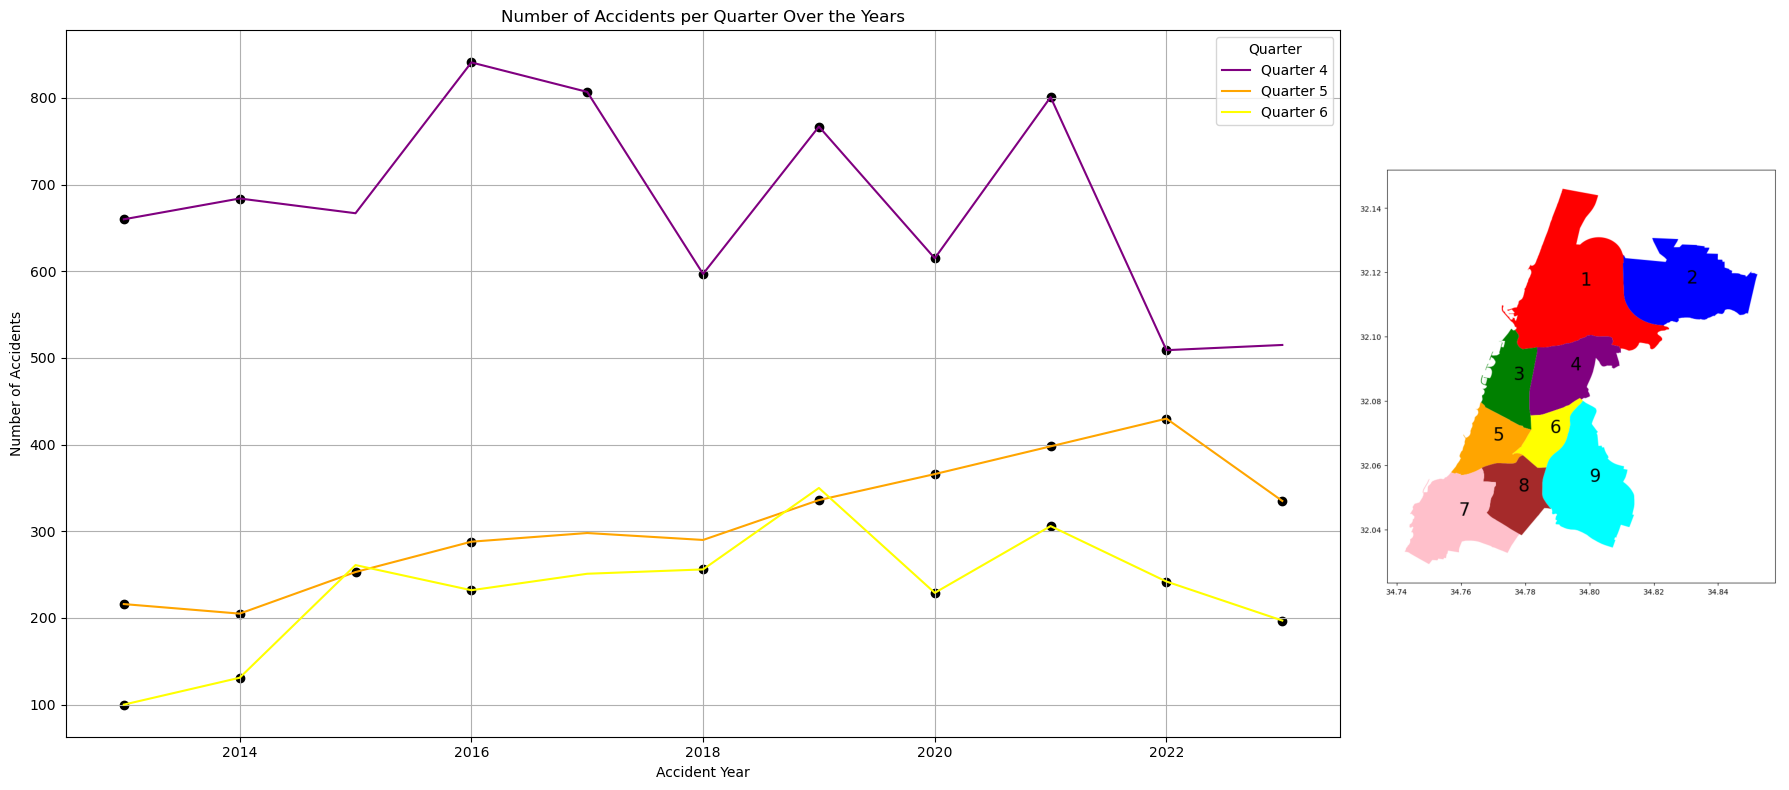

In [22]:
# Plot for quarters 4, 5, and 6
plot_accidents_and_image(accidents_bp_quarters, [4, 5, 6], './ta_q.png')


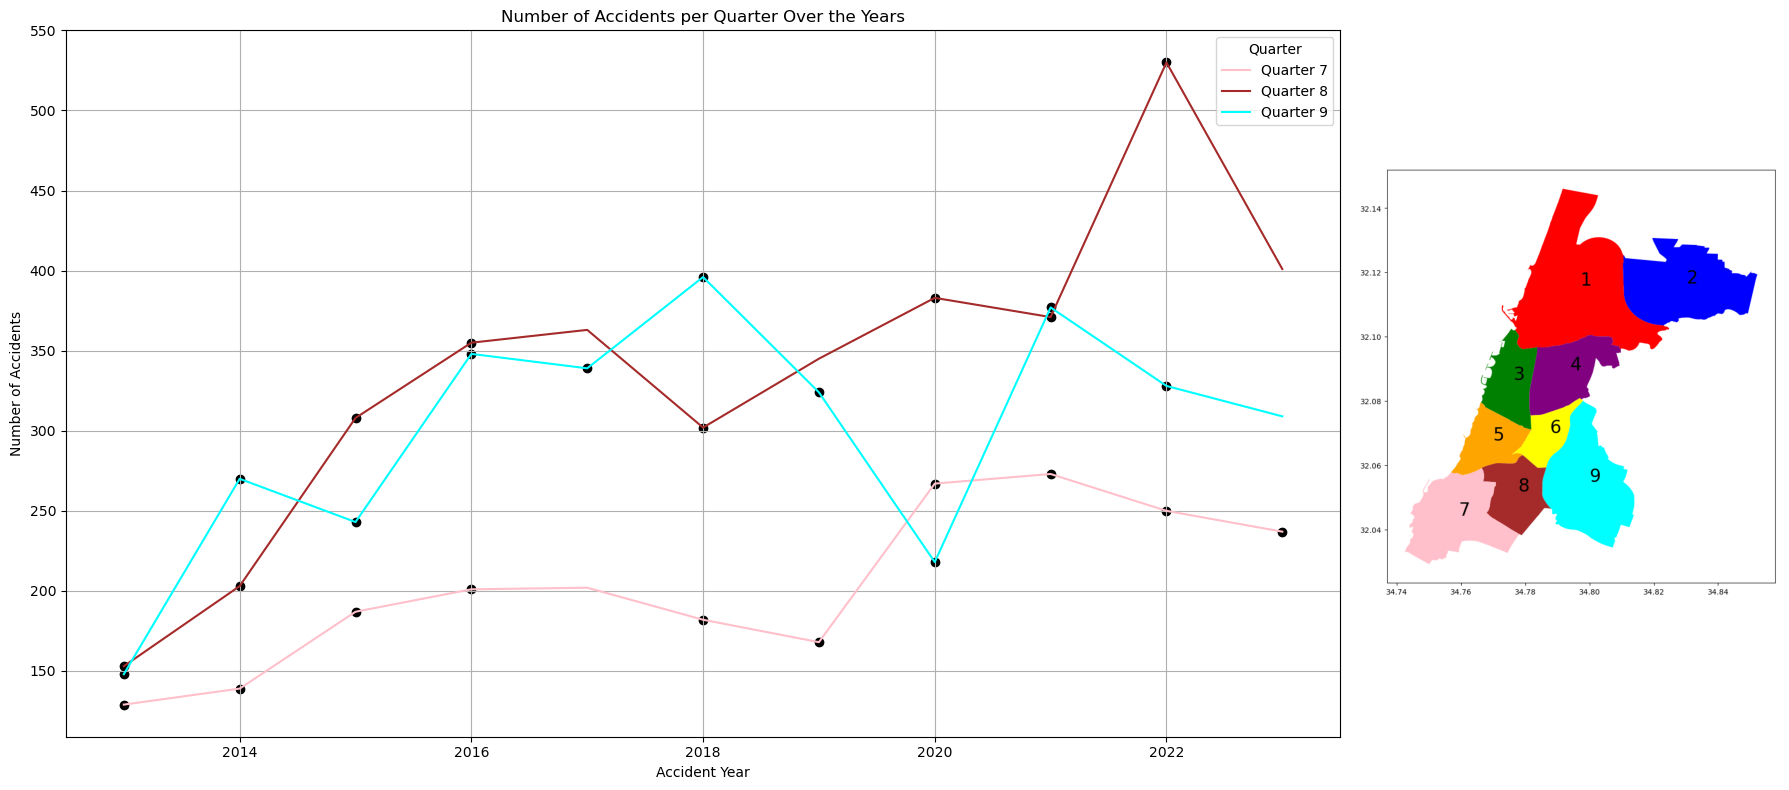

In [23]:

# Plot for quarters 7, 8, and 9
plot_accidents_and_image(accidents_bp_quarters, [7, 8, 9], './ta_q.png')

### Bugs and Solutions Summary:

1. **KeyError: 'None of [RangeIndex(start=0, stop=9, step=1)] are in the [columns]'**
   - **Cause:** Using `gdf.index` directly in the `column` parameter of the `plot` method.
   - **Solution:** Add the index as a new column in the GeoDataFrame and use that column for plotting.
     ```python
     ta_q['index'] = ta_q.index
     ta_q.plot(ax=ax, column='index', cmap='tab20', legend=True)
     ```

2. **ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined'**
   - **Cause:** Columns named `index_left` or `index_right` already exist in the GeoDataFrames being joined.
   - **Solution:** Rename conflicting columns before performing the spatial join.
     ```python
     if 'index_left' in accidents_bp_distance.columns:
         accidents_bp_distance = accidents_bp_distance.rename(columns={'index_left': 'accidents_index'})
     if 'index_right' in ta_q.columns:
         ta_q = ta_q.rename(columns={'index_right': 'quarters_index'})
     accidents_with_quarters = gpd.sjoin(accidents_bp_distance, ta_q[[ 'oidrova', 'geometry']], how='inner', predicate='intersects')
     ```

In [24]:
accidents_bp_quarters.accident_year.value_counts()

2021    3014
2019    2844
2016    2792
2017    2742
2022    2676
2018    2518
2020    2508
2023    2392
2015    2297
2014    2169
2013    1629
Name: accident_year, dtype: int64

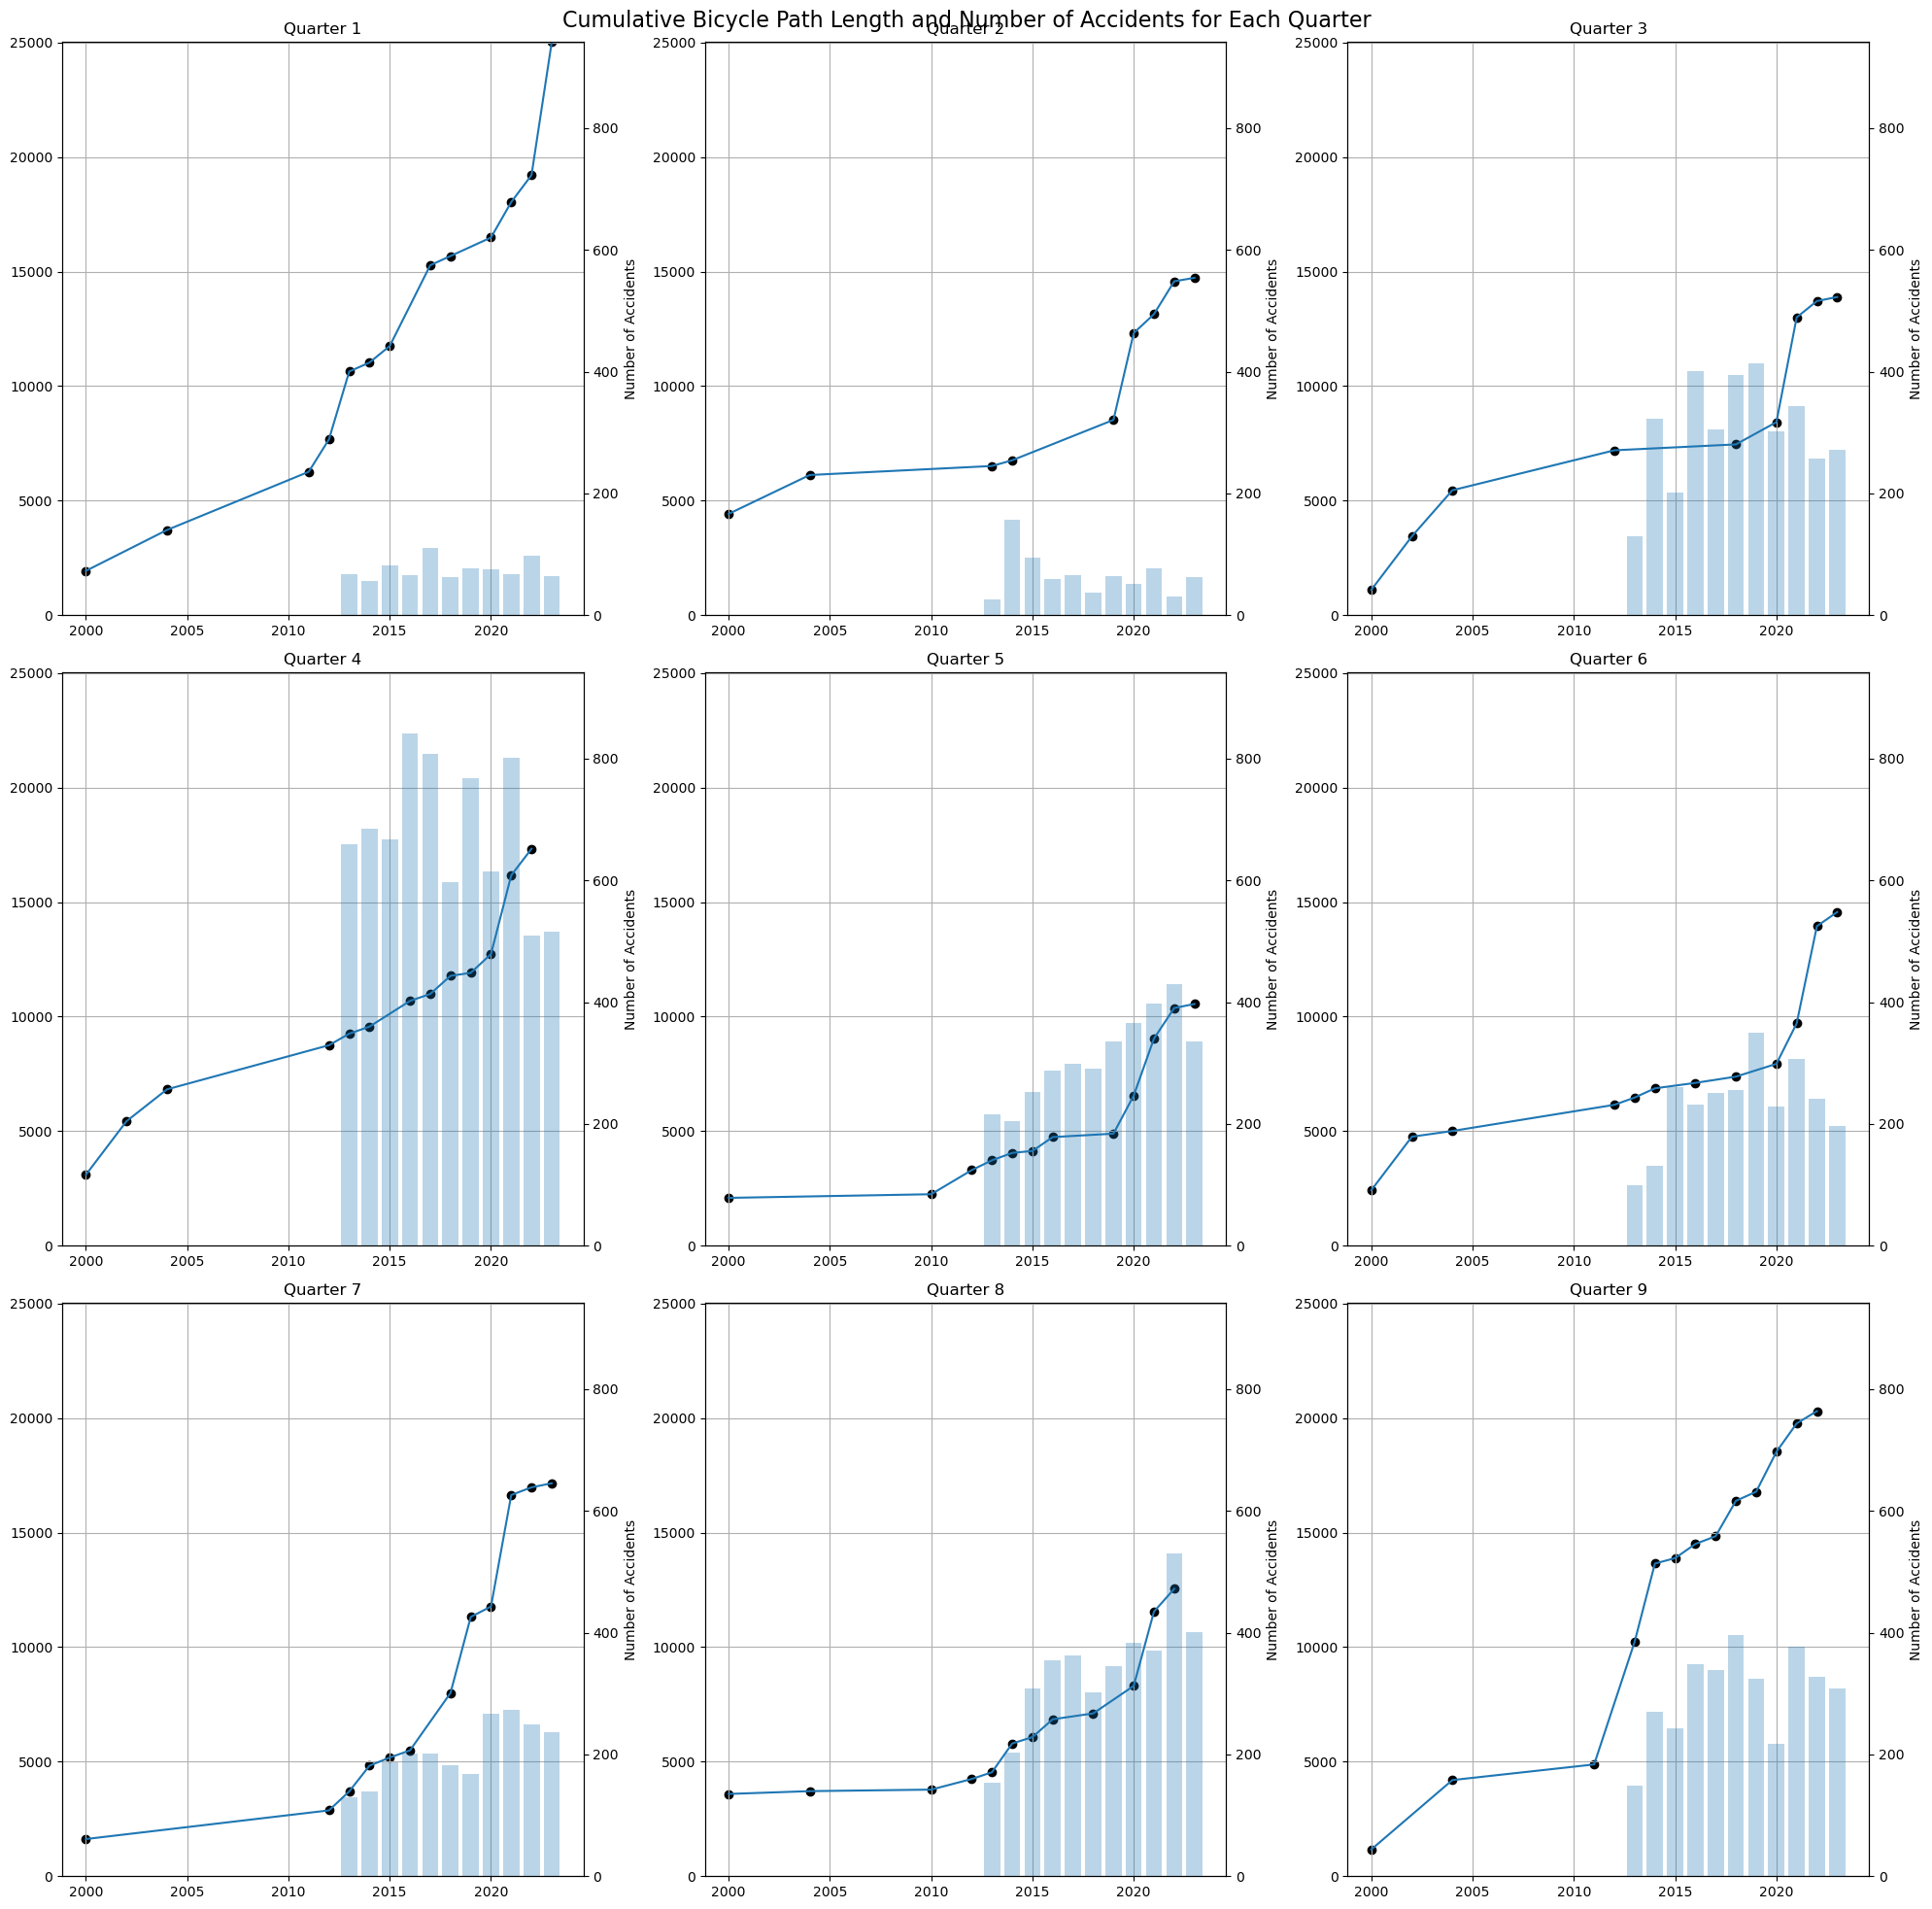

In [25]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Assuming your DataFrame is named 'accidents_bp_quarters'
quarters = np.sort(accidents_bp_quarters['krova'].unique())  # Get the unique quarters

# Find the krova with the highest sum of bicycle path lengths
max_krova = accidents_bp_quarters.groupby(['krova'])['msorech'].unique().apply(lambda x: x.sum()).idxmax()

# Get the maximum cumulative length for the max_krova
max_length = accidents_bp_quarters[accidents_bp_quarters['krova'] == max_krova].groupby('bp_create_year')['msorech'].unique().apply(lambda x: x.sum()).cumsum().max()

# Find the maximum number of accidents in any krova and accident_year combination
max_accidents = accidents_bp_quarters.groupby(['krova', 'accident_year']).size().max()

# Set the upper limit for the secondary y-axis (number of accidents)
accident_limit = max_accidents + 100

# Create a figure and specify the grid layout
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(3, 3, figure=fig)  # 3 rows, 3 columns

for i, quarter in enumerate(quarters):
    # Filter the DataFrame for the current quarter
    accidents_bp_quarters_quarter = accidents_bp_quarters[accidents_bp_quarters['krova'] == quarter]
    
    # Group by year and calculate the cumulative sum of bicycle path lengths
    accidents_bp_quarters_grouped = accidents_bp_quarters_quarter.groupby('bp_create_year')['msorech'].unique().apply(lambda x: x.sum()).cumsum()
    
    # Determine the subplot position based on the quarter index
    row = i // 3  # Integer division to determine the row index
    col = i % 3   # Modulo division to determine the column index
    ax1 = fig.add_subplot(gs[row, col])
    
    # Plot the line for the current quarter
    ax1.plot(accidents_bp_quarters_grouped.index, accidents_bp_quarters_grouped.values, label='Cumulative BP Length')
    # Add black dots on the cumulative line
    ax1.scatter(accidents_bp_quarters_grouped.index, accidents_bp_quarters_grouped.values, color='black')
    ax1.set_title(f'Quarter {quarter}')
    ax1.set_ylim(0, max_length)
    ax1.grid(True)
    ax1.ticklabel_format(style='plain', axis='y')
    
    # Create a secondary y-axis for the bar chart
    ax2 = ax1.twinx()
    
    # Count the number of accidents for each accident_year in the current quarter
    accident_counts = accidents_bp_quarters_quarter.groupby('accident_year').size()
    
    # Plot the bar chart on the secondary y-axis
    ax2.bar(accident_counts.index, accident_counts.values, alpha=0.3, label='Number of Accidents')
    ax2.set_ylabel('Number of Accidents')
    ax2.set_ylim(0, accident_limit)  # Set the upper limit for the secondary y-axis
    
# Set the overall title for the figure
fig.suptitle('Cumulative Bicycle Path Length and Number of Accidents for Each Quarter', fontsize=16)

plt.tight_layout()
plt.show()


### Understanding BP length in relation to accidents

1. Pearson correlation
2. Histogram ratio of number of accidents in relation to BP length each year in each quarter
3. Scatter plot x axis BP length y axis number of accidents, each scatter plot is for a different quarter and the length is changing since each year we have more length
4. Same as 3 but only for severe accidents
5. Check download from Tel Aviv maps צירי רחוב check if this is the actual road and can be used.
    * If so, normalize the BP length by the road length

In [26]:
accidents_bp_quarters.groupby(['krova', 'accident_year']).size().tail(20)

krova  accident_year
8      2015             308
       2016             355
       2017             363
       2018             302
       2019             345
       2020             383
       2021             371
       2022             530
       2023             401
9      2013             148
       2014             270
       2015             243
       2016             348
       2017             339
       2018             396
       2019             324
       2020             218
       2021             377
       2022             328
       2023             309
dtype: int64

In [27]:
accidents_bp_quarters.groupby(['krova', 'bp_create_year'])['msorech'].unique().apply(lambda x: x.sum()).groupby(level=0).cumsum()

krova  bp_create_year
1      2000               1939.32
       2004               3720.55
       2011               6261.65
       2012               7680.50
       2013              10639.68
                           ...   
9      2018              16388.77
       2019              16785.35
       2020              18526.39
       2021              19766.40
       2022              20303.47
Name: msorech, Length: 105, dtype: float64

In [30]:
accident_count = accidents_bp_quarters.groupby(['krova', 'accident_year']).size()
cumulative_msorech = accidents_bp_quarters.groupby(['krova', 'bp_create_year'])['msorech'].unique().apply(lambda x: x.sum()).groupby(level=0).cumsum()

cumulative_msorech = pd.DataFrame(cumulative_msorech)

cumulative_msorech['accident_count'] = accident_count
cumulative_msorech = cumulative_msorech.dropna()
cumulative_msorech.tail(50)

msorech  accident_count
krova bp_create_year                          
4     2018            11783.28           597.0
      2019            11912.76           767.0
      2020            12734.25           615.0
      2021            16172.45           801.0
      2022            17326.43           509.0
5     2013             3728.76           216.0
      2014             4052.62           205.0
      2015             4137.46           253.0
      2016             4743.12           288.0
      2019             4892.99           336.0
      2020             6554.75           366.0
      2021             9043.79           398.0
      2022            10377.27           430.0
      2023            10554.00           335.0
6     2013             6468.26           100.0
      2014             6870.99           131.0
      2016             7109.35           232.0
      2018             7381.98           256.0
      2020             7940.54           229.0
      2021             9704.31           306.0
      2022            13951.22           242.0
      2023            14565.99           197.0
7     2013             3702.45           129.0
      2014             4825.78           139.0
      2015             5181.80           187.0
      2016             5494.53           201.0
      2018             8000.81           182.0
      2019            11320.36           168.0
      2020            11774.72           267.0
      2021            16644.09           273.0
      2022            16977.85           250.0
      2023            17154.58           237.0
8     2013             4538.72           153.0
      2014             5795.10           203.0
      2015             6073.57           308.0
      2016             6851.45           355.0
      2018             7108.81           302.0
      2020             8308.11           383.0
      2021            11550.64           371.0
      2022            12546.79           530.0
9     2013            10234.86           148.0
      2014            13650.31           270.0
      2015            13888.01           243.0
      2016            14505.84           348.0
      2017            14843.32           339.0
      2018            16388.77           396.0
      2019            16785.35           324.0
      2020            18526.39           218.0
      2021            19766.40           377.0
      2022            20303.47           328.0

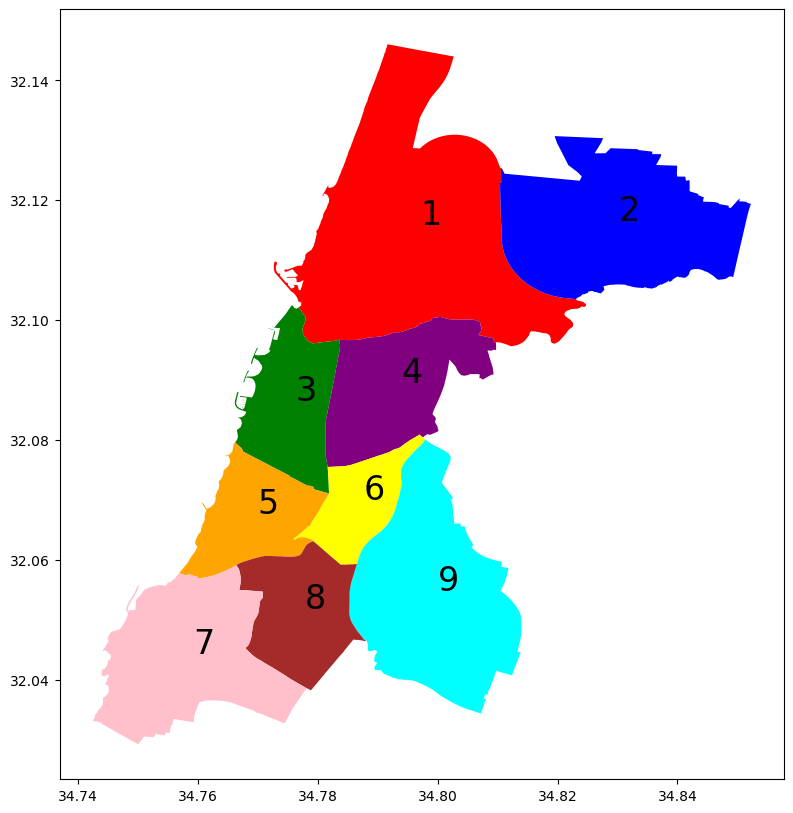

In [34]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Example GeoDataFrame (Replace with your actual GeoDataFrame)
# ta_q = gpd.read_file('your_shapefile.shp')

# Ensure 'index' column exists for referencing
ta_q['index'] = ta_q.index

# Define a list of colors
color_map = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
    5: 'orange', 6: 'yellow', 7: 'pink', 8: 'brown', 9: 'cyan'
}

# Basic plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each shape with a different color from the list
for idx, row in ta_q.iterrows():
    color = color_map[row['krova']]  # Cycle through the colors list
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color)

    # Get the centroid of the polygon to place the text
    centroid = row['geometry'].centroid
    ax.annotate(text=row['krova'], xy=(centroid.x, centroid.y), 
                xytext=(3, 3), textcoords="offset points",
                fontsize=24, color='black')

plt.show()


In [33]:
result = cumulative_msorech.groupby('krova')[['msorech', 'accident_count']].corr().unstack().iloc[:,1]

result

krova
1    0.078788
2   -0.357283
3   -0.683126
4   -0.310642
5    0.814575
6    0.301538
7    0.810240
8    0.873074
9    0.557722
Name: (msorech, accident_count), dtype: float64

In [31]:
cumulative_msorech.corr()

,msorech,accident_count
msorech,1.000000,0.022489
accident_count,0.022489,1.000000


#### Pearson Correlation